# Model for leaf disease detection, using CNN.

In [1]:
# import drive to load the dataset (plant_village dataset)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # cp to colab (it might increase IO speed), and extract
# !cp "/content/drive/MyDrive/archive.zip" "/content"
# !unzip -q archive.zip

# DATA_DIR = "/content/archive/PlantVillage"

In [7]:
# cp to colab (it might increase IO speed), and extract
!cp "/content/drive/MyDrive/Plant_leaf_diseases_dataset_with_augmentation.zip" "/content"
!unzip -q Plant_leaf_diseases_dataset_with_augmentation.zip

DATA_DIR = "/content/Plant_leave_diseases_dataset_with_augmentation"

In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 128 # reduce input img size for faster training
BATCH_SIZE = 64
DROP = 0.9 # calculated through experimentation

# we rescale all our images with the rescale parameter
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)
# validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE, #images getting inputed into the neural network through each epoch or each step
    subset='training',
    class_mode="categorical"
)

num_classes = len(train_generator.class_indices)

validation_generator = datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode="categorical"
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(DROP),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Found 49197 images belonging to 39 classes.
Found 12289 images belonging to 39 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                  

In [9]:
# train the model
history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    # validation_steps=50,
    # verbose=2,
)

Epoch 1/20
769/769 [==============================] - 118s 141ms/step - loss: 2.8966 - accuracy: 0.2385 - val_loss: 2.0959 - val_accuracy: 0.4161
Epoch 2/20
769/769 [==============================] - 110s 142ms/step - loss: 1.9351 - accuracy: 0.4515 - val_loss: 1.2538 - val_accuracy: 0.6378
Epoch 3/20
769/769 [==============================] - 104s 135ms/step - loss: 1.4034 - accuracy: 0.5862 - val_loss: 0.9102 - val_accuracy: 0.7315
Epoch 4/20
769/769 [==============================] - 104s 136ms/step - loss: 1.1292 - accuracy: 0.6590 - val_loss: 0.7044 - val_accuracy: 0.7850
Epoch 5/20
769/769 [==============================] - 105s 137ms/step - loss: 0.9494 - accuracy: 0.7081 - val_loss: 0.6250 - val_accuracy: 0.8080
Epoch 6/20
769/769 [==============================] - 105s 137ms/step - loss: 0.8384 - accuracy: 0.7411 - val_loss: 0.4919 - val_accuracy: 0.8491
Epoch 7/20
769/769 [==============================] - 97s 126ms/step - loss: 0.7405 - accuracy: 0.7687 - val_loss: 0.4522 - 

In [14]:
# test the model

import numpy as np

from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediction on the uploaded image
  path = '/content/' + fn
  img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) 
  
  # scaling process
  x = img_to_array(img)
  x /= 255 
  x = np.expand_dims(x, axis=0)
  # flatten the output
  image = np.vstack([x])
  
  # prediction!
  classes = model.predict(image)
  
  print(classes[0], train_generator.class_indices)

  print(list(classes[0]).index(max(classes[0])))

Saving 1bff3ab2-9e99-4d4b-ad0e-acd943324050___RS_Erly.B 6460.JPG to 1bff3ab2-9e99-4d4b-ad0e-acd943324050___RS_Erly.B 6460 (2).JPG
1/1 [==============================] - 0s 15ms/step
[2.22684680e-08 1.32825513e-13 1.07343837e-07 1.09847358e-08
 1.91480012e-10 3.45586054e-13 1.72206815e-11 2.84144554e-20
 4.55185820e-11 7.77382529e-15 5.37724830e-11 3.50902294e-21
 7.03347647e-09 8.82543347e-14 1.64575737e-13 7.03904761e-16
 1.15414562e-11 3.09887764e-05 2.48358235e-12 8.22808147e-07
 2.03123710e-15 1.94129652e-13 1.26252564e-08 1.11256004e-21
 2.90179384e-18 4.69757019e-14 6.48020249e-11 6.17616791e-11
 5.45009959e-21 1.80780023e-01 8.13782454e-01 4.89666534e-04
 3.78006115e-03 1.11029227e-03 1.17626065e-07 2.52424093e-06
 2.28566223e-05 3.00455182e-11 4.59502922e-11] {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___

Text(0.5, 1.0, 'Loss in training and validation')

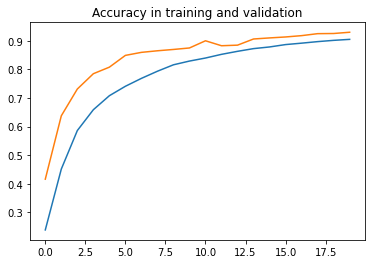

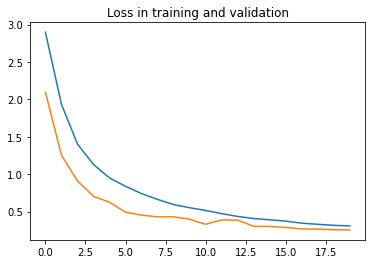

In [11]:
# get the metrics from history
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [12]:
# get labels.txt and model.tflite file, to use them in the app

print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)


saved_model_dir = ''
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# download from colab
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___Septo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>